<center><h1> Anomaly Detection </h1></center>

# 1. Information

https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.mlab as mlab
%matplotlib inline
import warnings
pd.set_option('display.max_columns', 30)
warnings.filterwarnings('ignore')


## 2.2 Import data

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,...,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,...,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,...,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,...,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,...,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.shape

(284807, 31)

В датасете нет пропущеных значений.

# 4. EDA

## 4.1 Target variable *'Сlass'*

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

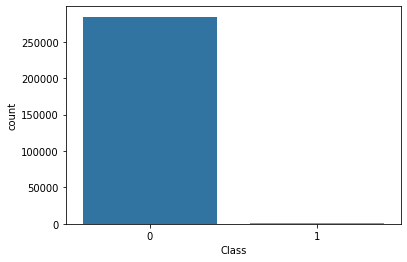

In [8]:
sns.countplot(x='Class',data=data, orient='v')

In [9]:
exp_assess = (data['Class'].value_counts()[1]/data['Class'].value_counts()[0])
print('В качестве экспертной оценки, возьмем процент аномай в данных ', exp_assess*100)

В качестве экспертной оценки, возьмем процент аномай в данных  0.17304750013189596


## 4.2 Base statistics and distributions

In [10]:
data.describe(percentiles = [0.05, 0.25, 0.75, 0.95])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,...,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,...,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,...,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
5%,25297.600000,-2.899147e+00,-1.971975e+00,-2.389740e+00,-2.195683e+00,-1.702021e+00,-1.406757e+00,-1.434423e+00,-8.421469e-01,-1.758426e+00,-1.338636e+00,-1.571901e+00,-1.967162e+00,-1.639729e+00,-1.439351e+00,...,-1.491663e+00,-9.830039e-01,-1.358094e+00,-1.356259e+00,-5.584349e-01,-5.046735e-01,-1.081892e+00,-4.722464e-01,-1.143662e+00,-8.250264e-01,-6.973483e-01,-4.152460e-01,-3.178432e-01,0.920000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,...,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,...,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,...,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
95%,164143.400000,2.081223e+00,1.808585e+00,2.062635e+00,2.566501e+00,2.098960e+00,3.160382e+00,1.407632e+00,1.049984e+00,1.780783e+00,1.548557e+00,1.614033e+00,1.243053e+00,1.607877e+00,1.393653e+00,...,1.325253e+00,1.274609e+00,1.394392e+00,1.286164e+00,8.361441e-01,5.378677e-01,1.128987e+00,4.880160e-01,8.663576e-01,7.606986e-01,9.209154e-01,3.877462e-01,2.560897e-01,365.000000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,...,1.731511e+01,9.253526e+00,5.041069e+00,5.59

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFA0548>,
      dtype=object)

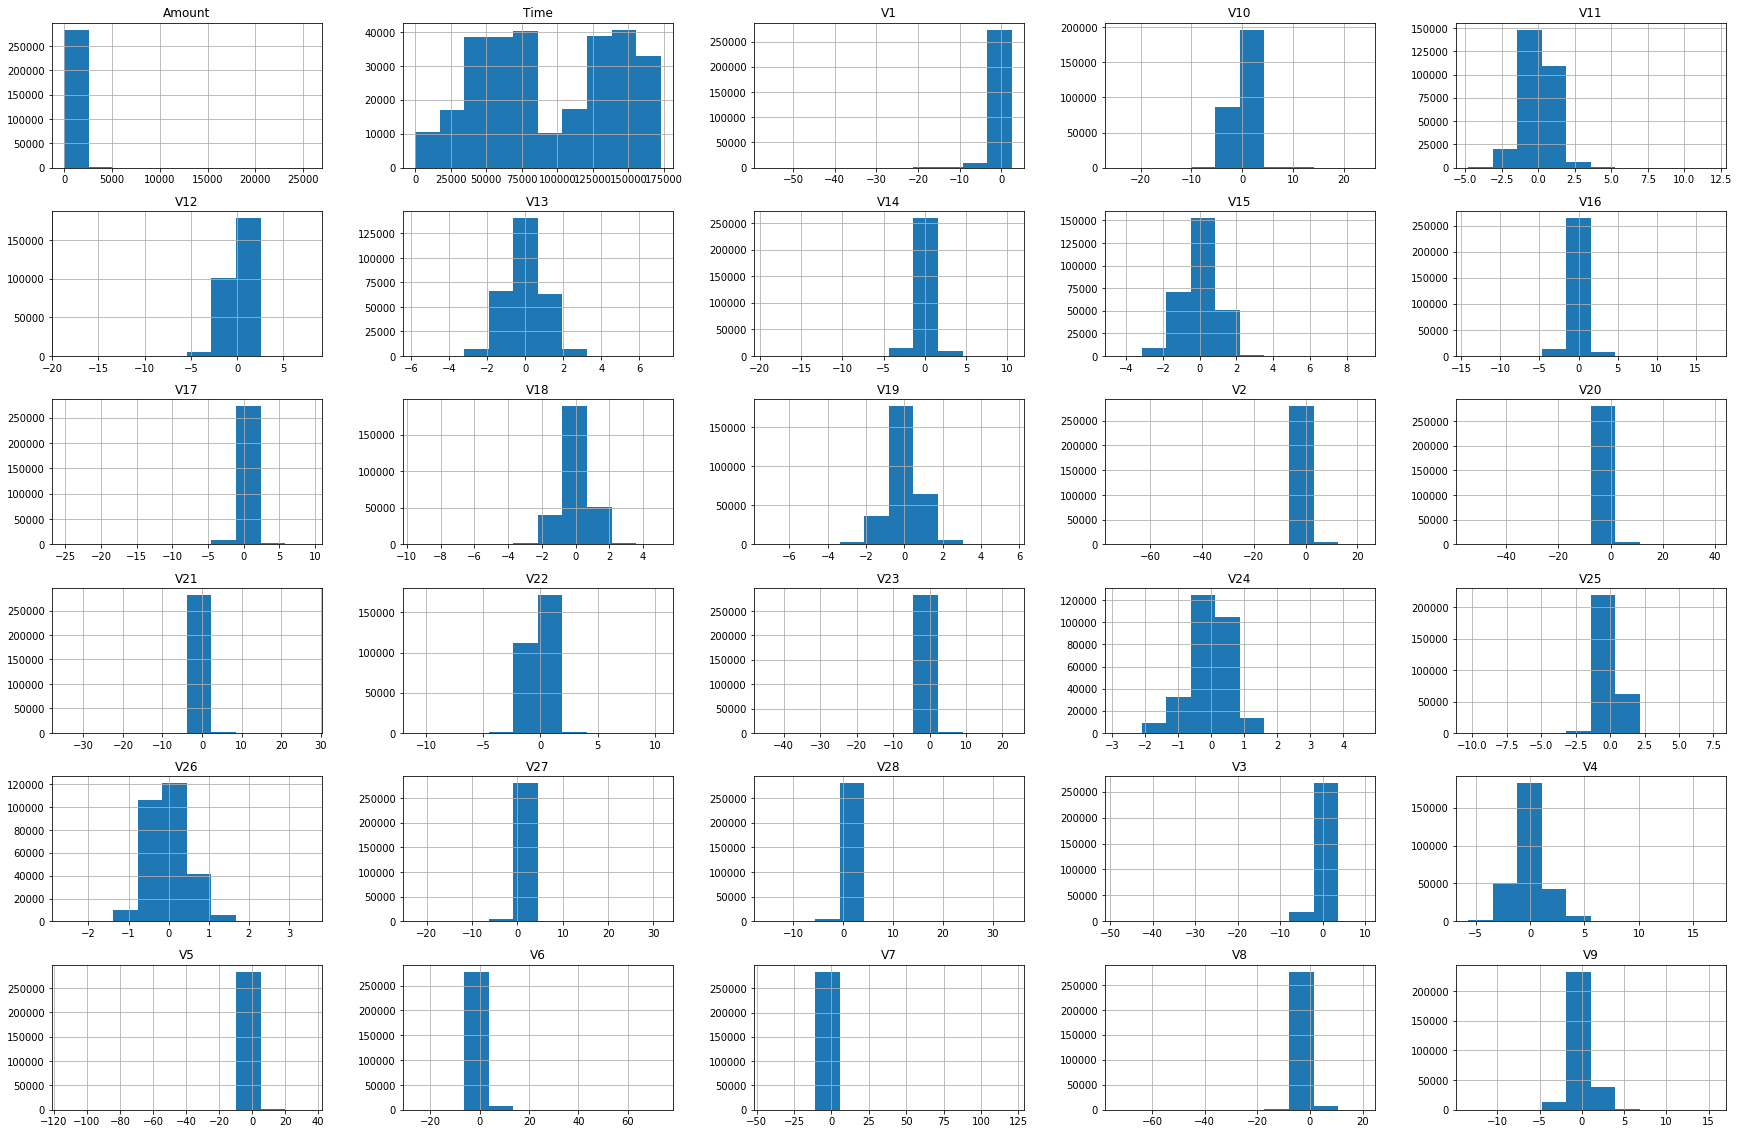

In [11]:
data.drop('Class', axis=1).hist(figsize=(30,20))

## 4.3 Correlation analysis

(31.5, -0.5)

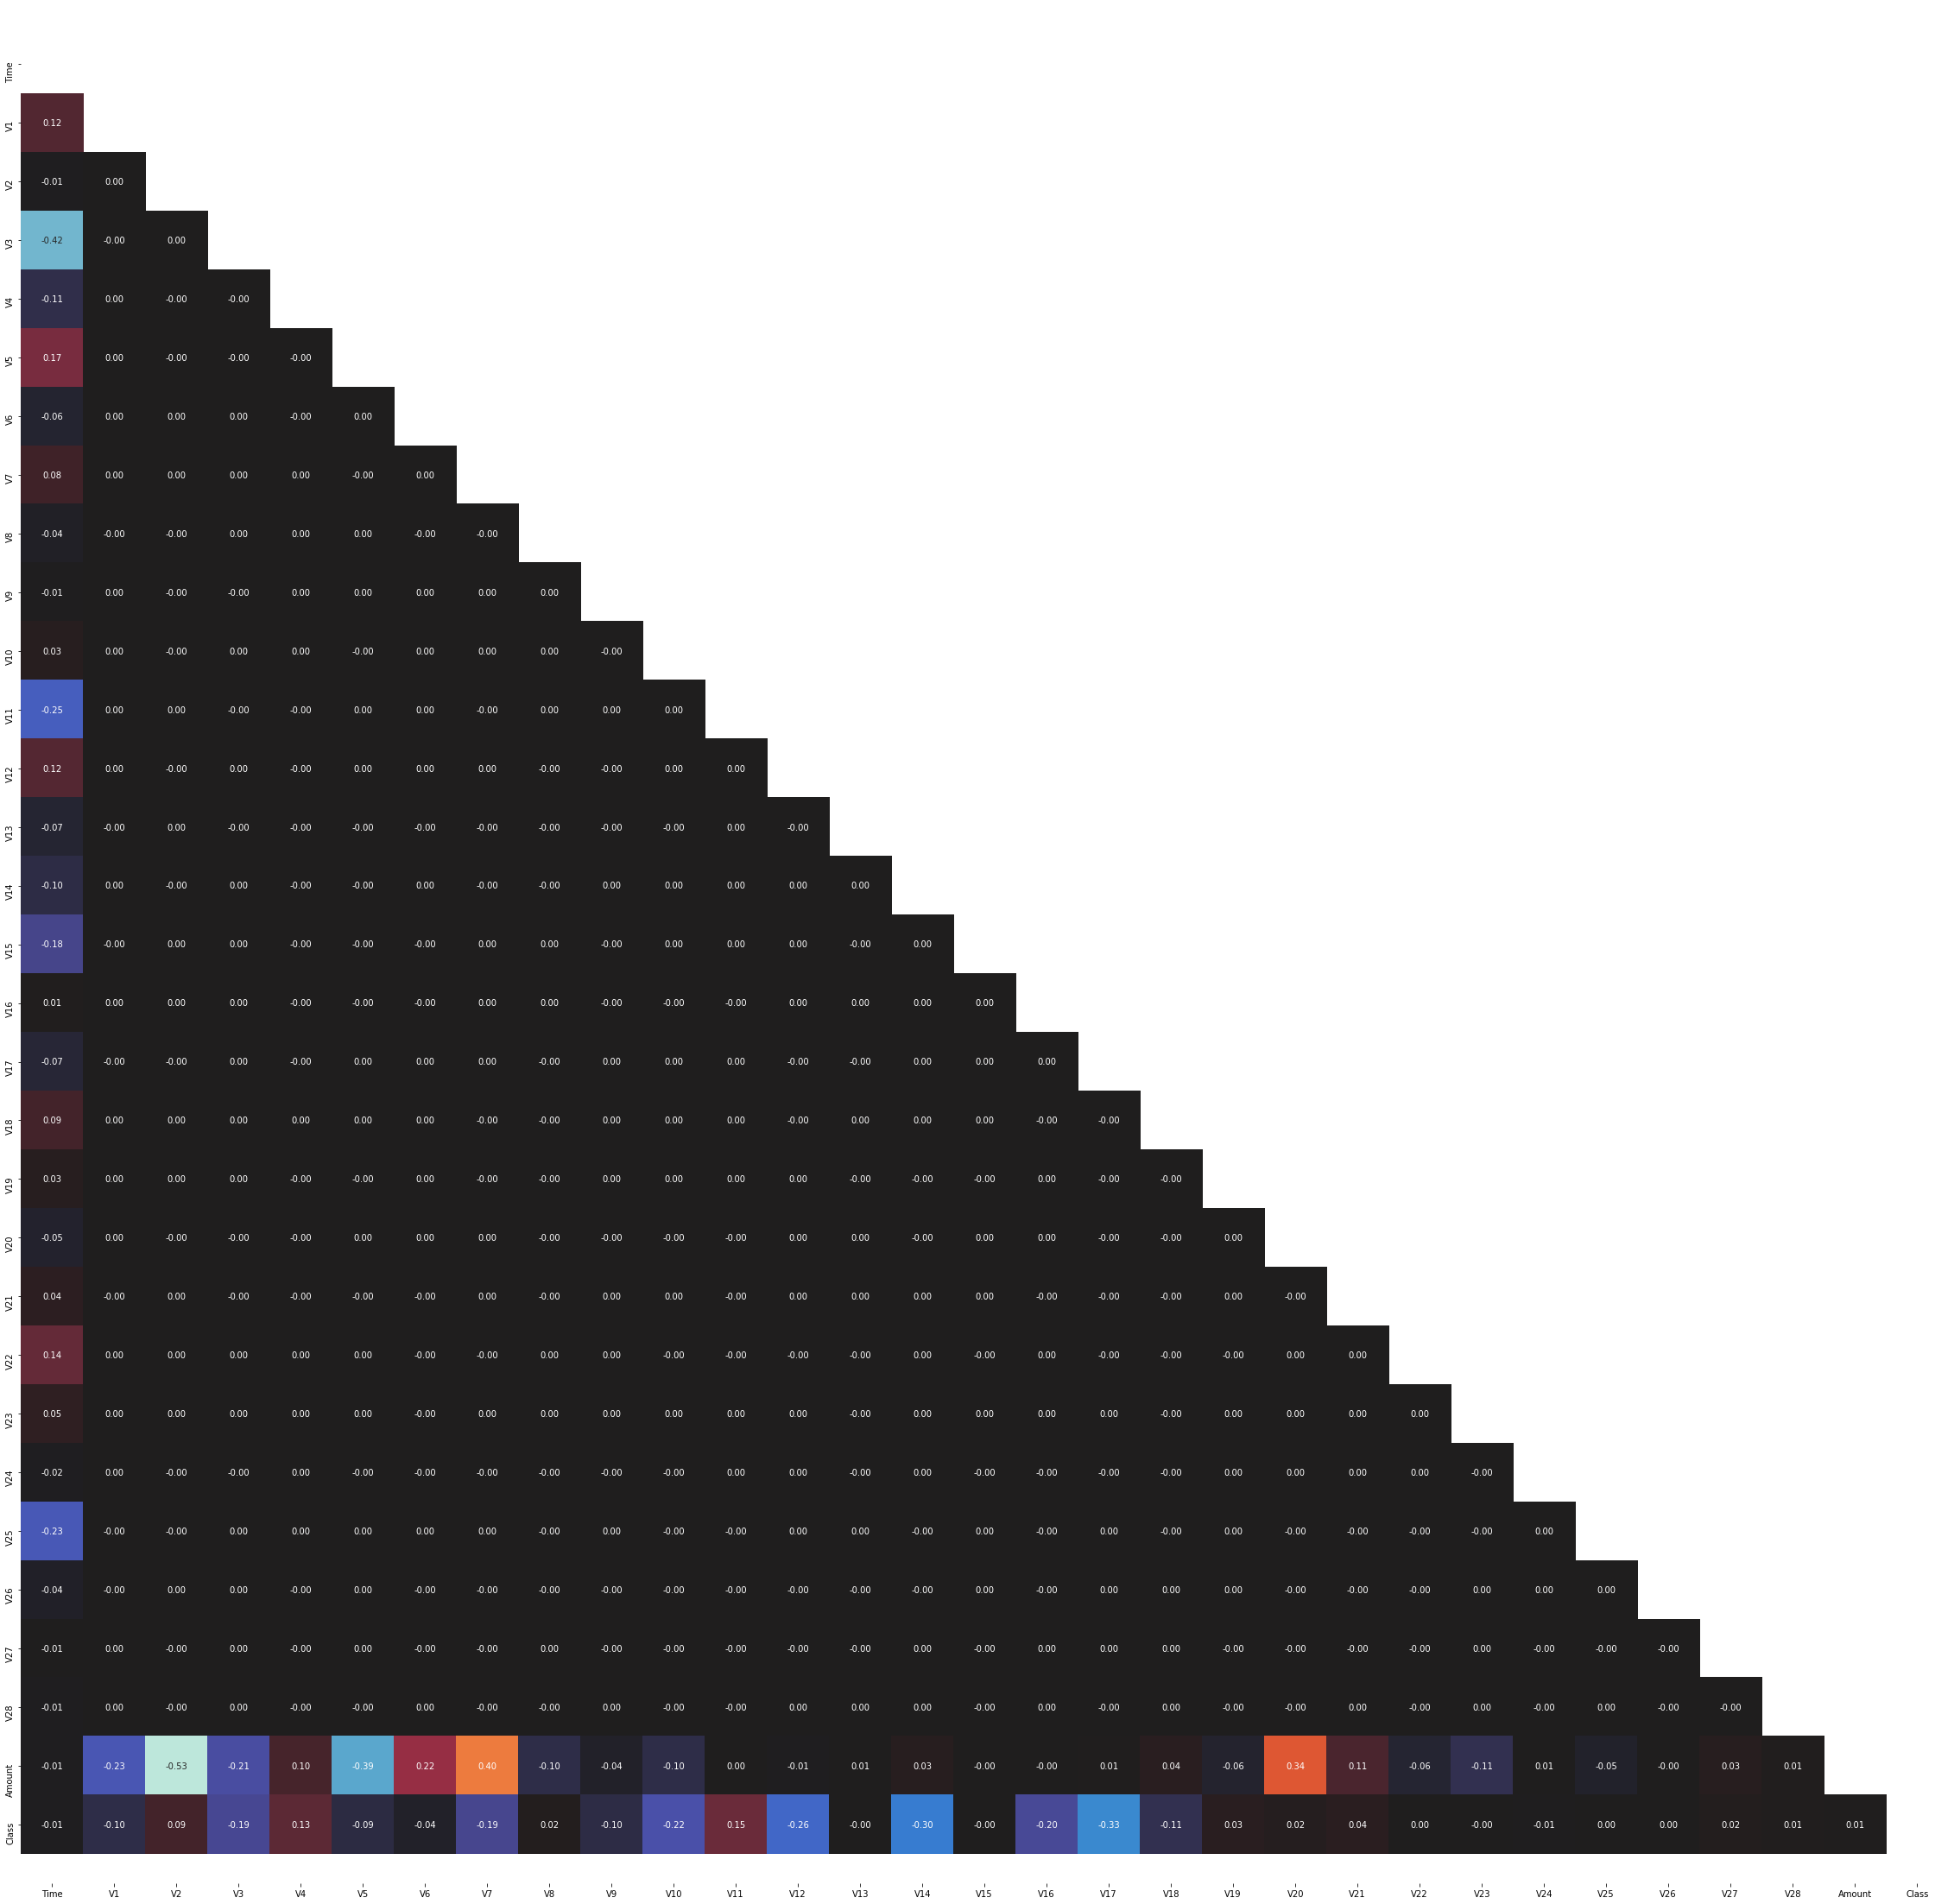

In [12]:
plt.figure(figsize=(40,40))
corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
ax = sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Сильной корреляции между признаками не наблюдается.

# 5 Machine learning 

## 5.1 Import packages

In [13]:
import umap
import hdbscan
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist


In [14]:
def plot_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm)
    plt.figure(figsize = (5,5))
    ax=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

## 5.2 Data Split and Scaling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Class'], axis=1),
    data['Class'], test_size=0.3,
    stratify=data['Class'],
    random_state=42)

In [16]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(
    data=scaler.fit_transform(X_train), 
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    data=scaler.fit_transform(X_test), 
    columns=X_train.columns
)

In [17]:
data_features = data.iloc[:, :-1]

In [18]:
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data.drop(labels=['Class'], axis=1)), 
    columns=X_train.columns
)

## 5.3 Algorithms and methods for finding anomalies

### 5.3.1 Three Sigma (68–95–99,7) Rule

In [103]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [104]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))

In [105]:
comparison_table, std_outliers = get_column_outliers(data_features, threshold = 3)
anomalies_report(std_outliers)

Total number of outliers: 37816
Percentage of outliers:   13.28%


In [106]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V27,1.210897,-1.210897,4771.0,1.675170
V6,3.996813,-3.996813,4652.0,1.633387
V20,2.312775,-2.312775,4645.0,1.630929
V2,4.953926,-4.953926,4318.0,1.516114
V8,3.583059,-3.583059,4221.0,1.482056
Amount,838.709947,-662.010708,4076.0,1.431145
V21,2.203572,-2.203572,4064.0,1.426931
V1,5.876087,-5.876087,3701.0,1.299476
V10,3.266549,-3.266549,3488.0,1.224689
V7,3.711281,-3.711281,3401.0,1.194142


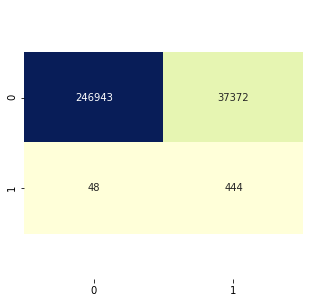

In [107]:
plot_confusion(data['Class'],std_outliers)

In [108]:
print(classification_report(data['Class'], std_outliers))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    284315
           1       0.01      0.90      0.02       492

    accuracy                           0.87    284807
   macro avg       0.51      0.89      0.48    284807
weighted avg       1.00      0.87      0.93    284807



In [99]:
reducer = umap.UMAP(
                    n_neighbors=10,
                    min_dist   =0.3
                   )
embedding = reducer.fit_transform(scaled_data)

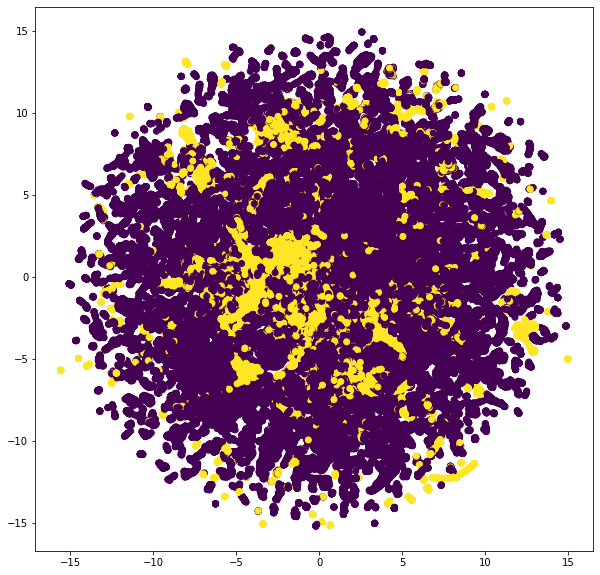

In [109]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=std_outliers);

### 5.3.2 Interquartile deviation

In [110]:
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [111]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 53336
Percentage of outliers:   18.73%


In [112]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Amount,291.860000,-209.095000,18941.0,6.650469
V27,0.576699,-0.556493,16524.0,5.801824
V20,1.167327,-1.246008,13385.0,4.699674
V28,0.471999,-0.446679,12573.0,4.414568
V8,1.935273,-1.816557,11285.0,3.962332
V23,1.076107,-1.090312,8135.0,2.856320
V21,1.430694,-1.472711,6934.0,2.434631
V6,3.899146,-4.268877,5389.0,1.892159
V2,5.010545,-4.805371,4453.0,1.563515
V10,3.421971,-3.503473,3208.0,1.126377


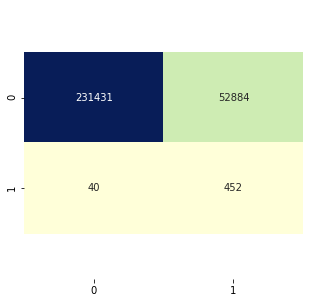

In [113]:
plot_confusion(data['Class'],iqr_outliers)

In [114]:
print(classification_report(data['Class'], iqr_outliers))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90    284315
           1       0.01      0.92      0.02       492

    accuracy                           0.81    284807
   macro avg       0.50      0.87      0.46    284807
weighted avg       1.00      0.81      0.90    284807



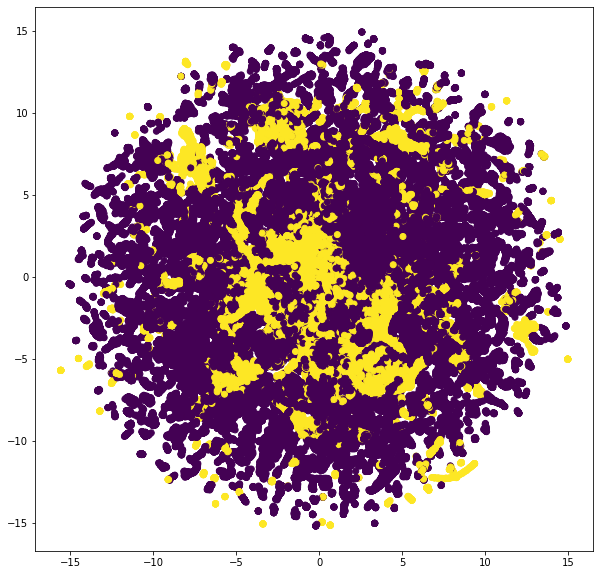

In [115]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=iqr_outliers);

### 5.3.3 Distance-based Clusterization

In [116]:
class DistanceOutliers(BaseEstimator):
    """
    Distance based outlier detector model
    
    Fit method calculates centroid of training samples and
    using `metric` get distances from centroid to train samples.
    Having distances - we calculate `threshold` based on `percentile`.
    
    Predict method uses `threshold` and `metric` to determine, whether
    distance to sample from centroid is too large -> outlier.
    
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [117]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 28481
Percentage of outliers:   10.00%


In [118]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=90)
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

Total number of outliers: 28481
Percentage of outliers:   10.00%


In [119]:
cosine_model = DistanceOutliers(metric='cosine', percentile=90)
cosine_model.fit(scaled_data)
cosine_outliers = cosine_model.predict(scaled_data)
anomalies_report(cosine_outliers)

Total number of outliers: 28481
Percentage of outliers:   10.00%


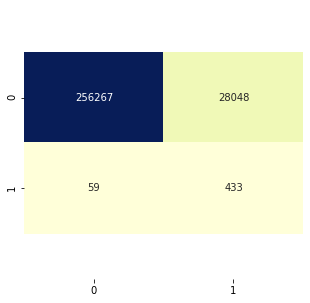

In [120]:
plot_confusion(data['Class'],cityblock_outliers)

In [121]:
print(classification_report(data['Class'], cityblock_outliers))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    284315
           1       0.02      0.88      0.03       492

    accuracy                           0.90    284807
   macro avg       0.51      0.89      0.49    284807
weighted avg       1.00      0.90      0.95    284807



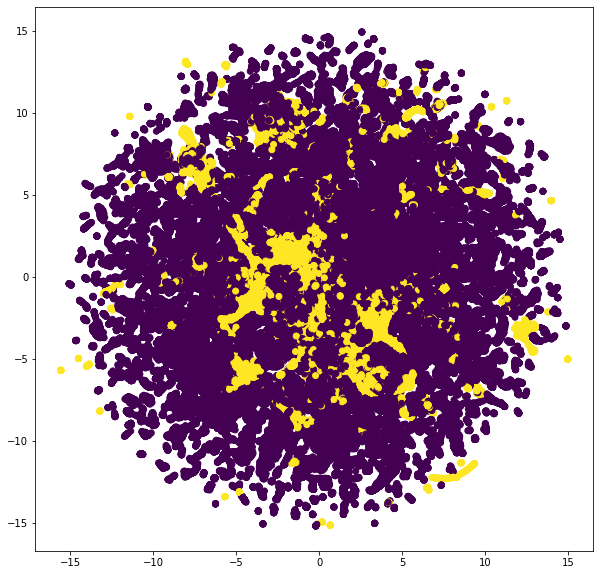

In [122]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=cityblock_outliers);

### 5.3.3 DBSCAN Clusterization 

In [29]:
num_clusters = []
anomaly_percentage = []

eps = 2
eps_history = [eps]
  
dbscan_outlier = DBSCAN(
                eps        = eps,
                min_samples= 100,
                #leaf_size  =  2,
                n_jobs     = -1
                ).fit(scaled_data)
labels = dbscan_outlier.labels_
num_clusters.append(len(np.unique(labels))-1)
labels = np.array([1 if label == -1 else 0 for label in labels])
# считаем текущий процент "шума"
outlier_percentage = sum(labels==1) / len(labels)    
#eps += 0.05
eps_history.append(eps)
anomaly_percentage.append(outlier_percentage)

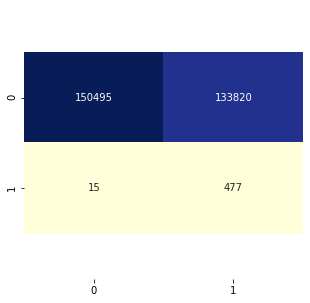

In [30]:
dbscan_outlier = np.array([1 if label == -1 else 0 for label in dbscan_outlier.labels_])
plot_confusion(data['Class'],dbscan_outlier)

In [31]:
print(classification_report(data['Class'], dbscan_outlier))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69    284315
           1       0.00      0.97      0.01       492

    accuracy                           0.53    284807
   macro avg       0.50      0.75      0.35    284807
weighted avg       1.00      0.53      0.69    284807



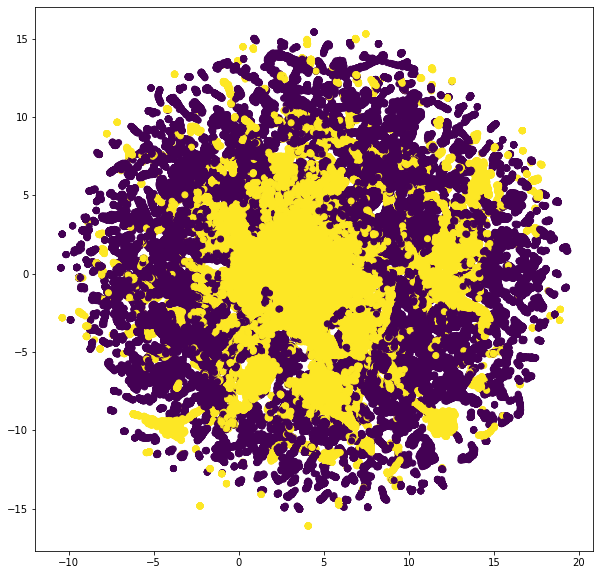

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_outlier);

### 5.3.4  HDBSCAN Clusterization

In [47]:
clusterer  = hdbscan.HDBSCAN(
                                allow_single_cluster     =True,
                                min_cluster_size         = 500,
                                min_samples              = 20,
                                core_dist_n_jobs          =-1
)
clusterer.fit(scaled_data)
labels = clusterer.labels_
num_clusters=(len(np.unique(labels))-1)
labels = np.array([1 if label == -1 else 0 for label in labels])
outlier_percentage = sum(labels==1) / len(labels)  
n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
n_noise_ = list(clusterer.labels_).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_) 
print('Estimated persent of outlier: ', outlier_percentage)

Estimated number of clusters: 1
Estimated number of noise points: 11721
Estimated persent of outlier:  0.04115418511483215


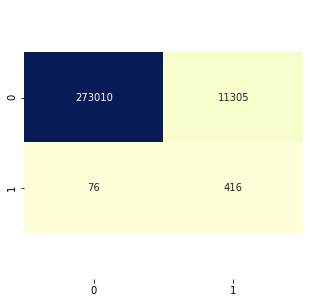

In [48]:
hdbscan_outlier = np.array([1 if label == -1 else 0 for label in clusterer.labels_])
plot_confusion(data['Class'],hdbscan_outlier)

In [101]:
hdbscan_outlier = np.array([1 if label == -1 else 0 for label in clusterer.labels_])
print(classification_report(data['Class'], hdbscan_outlier))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.04      0.85      0.07       492

    accuracy                           0.96    284807
   macro avg       0.52      0.90      0.52    284807
weighted avg       1.00      0.96      0.98    284807



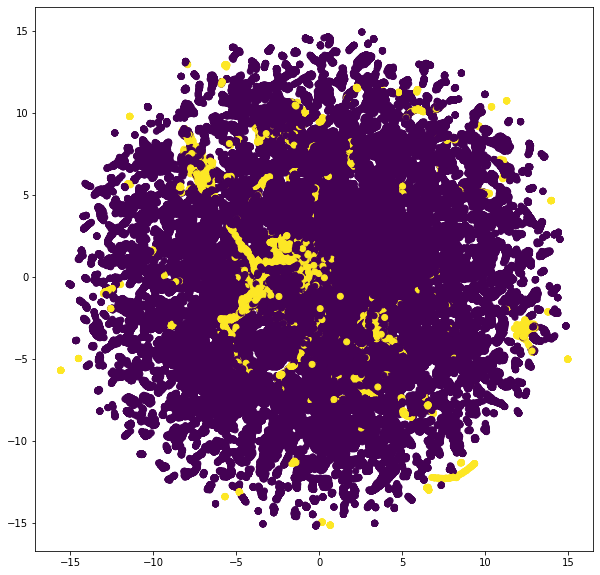

In [102]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan_outlier);

### 5.3.5 One-Class SVM

In [22]:
one_class_svm = OneClassSVM(nu=exp_assess, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

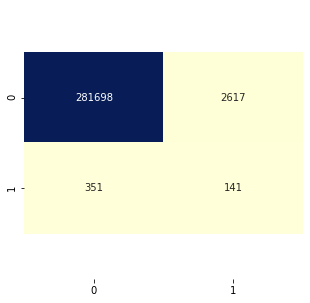

In [23]:
plot_confusion(data['Class'],svm_outliers)

In [24]:
print(classification_report(data['Class'], svm_outliers))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.05      0.29      0.09       492

    accuracy                           0.99    284807
   macro avg       0.52      0.64      0.54    284807
weighted avg       1.00      0.99      0.99    284807



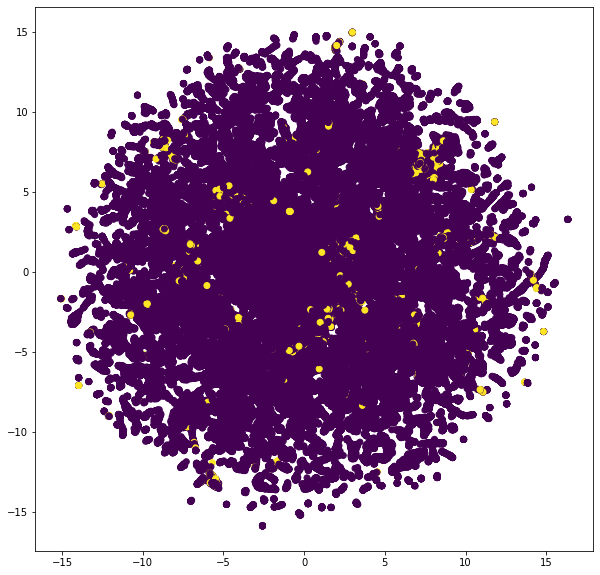

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=svm_outliers);

### 5.3.6 Isolation Forest

In [34]:
isolation_forest = IsolationForest(n_estimators=100, contamination=exp_assess, 
                                   max_features=1.0, bootstrap=True, behaviour="new", n_jobs=-1)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

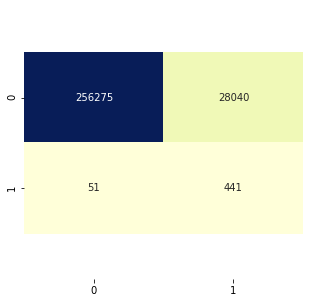

In [33]:
plot_confusion(data['Class'],isolation_outliers)

In [30]:
print(classification_report(data['Class'], isolation_outliers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.29      0.29       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



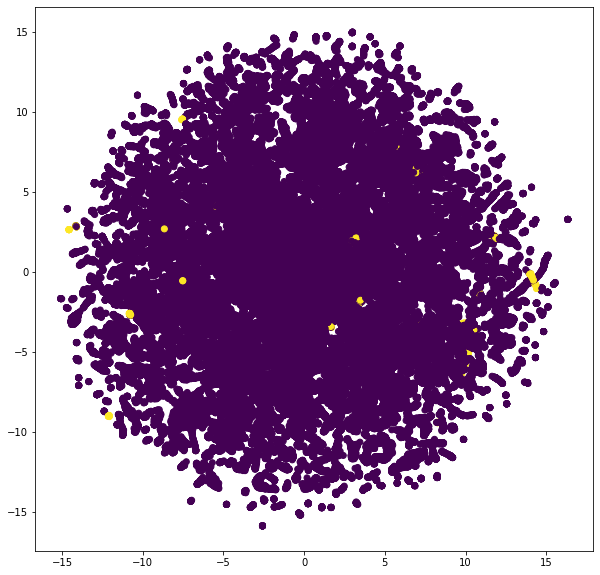

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=isolation_outliers);

# 6. Conclusion

Датасет я осознанно не модифицировал (не сокращал и не выкидывал значения), чтобы проверить работу алгоритмов на большом объеме данных. Тем более, что любые модификации исказили бы картину.
1.	Ожидаемо результаты линейных методов (3-сигмы, межквартильное отклонение, кластеризация по дистанции) показали себя не очень хорошо. Из-за дисбаланса классов очень низкая точность обнаружения выбросов.
2.	**DB-Scan** показал себя плохо, но это связано, главным образом, с тем, что мне не хватило времени его нормально настроить.  У меня нет под рукой хорошего сервера, а одна итерация  на  моем ПК занимает минут 30. При некоторых значениях сигмы **DB-Scan** от **sklearn** вообще вылетал. Это, скорее всего, связано с нехваткой оперативной памяти (16 GB на этом датасете ему явно мало) и регулировка очереди через параметр **leaf_size** не помогла. Было решено поискать другой плотностной алгоритм.
3.	HDB-Scan справился лучше. Его гораздо удобней настраивать, но параллелится у него нормально только первый этап алгоритма (расчет метрик). Работает он тоже медленно (в среднем минут 40, в зависимости от настроек), но показал себя получше.
4.	Была попытка запустить **Local Outlier Factor**. Он проработал час и выдал результат настолько плохой, что я его в notebook даже не стал включать.
5.	Лучше всего себя показали **One-Class SVM** и **Isolation Forest** (особенно **Isolation Forest**).  Эти алгоритмы быстро работают и выдают очень неплохой результат.  
  
P.S. Очень захотелось написать DB-Scan на verilog или OpenCL. Я нашел только реализацию на CUDA, а у меня Radion.